In [ ]:
import yfinance as yf
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt

# === Configuration ===
TICKER = "BSE.NS"              # Stock symbol
INTERVAL = "5m"              # 5-minute candles
SHORT_WINDOW = 5             # Short-term SMA
LONG_WINDOW = 20             # Long-term SMA
SLEEP_DURATION = 60 * 5      # Wait 5 minutes between loops

# === Fetch Market Data ===
def fetch_data(ticker, interval, period="2d"):
    data = yf.download(ticker, interval=interval, period=period)
    data.dropna(inplace=True)
    return data

# === Strategy: SMA Crossover ===
def apply_strategy(df):
    df["SMA_Short"] = df["Close"].rolling(window=SHORT_WINDOW).mean()
    df["SMA_Long"] = df["Close"].rolling(window=LONG_WINDOW).mean()

    df["Signal"] = (df["SMA_Short"] > df["SMA_Long"]).astype(int)
    df["Position"] = df["Signal"].diff().fillna(0)

    # Debug: Print last few rows
    print(df[["Close", "SMA_Short", "SMA_Long", "Signal", "Position"]].tail(10))

    return df

# === Simulate Trade Execution ===
def execute_trade(signal):
    if signal == 1:
        print("💰 BUY Signal Triggered!")
    elif signal == -1:
        print("❌ SELL Signal Triggered!")
    else:
        print("🔍 No Trade Signal.")

# === Optional: Plot for Visual Debug ===
def plot_chart(df):
    df[["Close", "SMA_Short", "SMA_Long"]].plot(figsize=(12, 6))
    plt.title("SMA Crossover Strategy")
    plt.show()

# === Main Bot Runner ===
def run_bot():
    print(f"🚀 Starting Intraday Bot for {TICKER}")

    while True:
        try:
            now = datetime.datetime.now()

            # Stop after market close
            if now.time() >= datetime.time(16, 0):
                print("🔒 Market closed. Stopping bot.")
                break

            df = fetch_data(TICKER, INTERVAL)
            df = apply_strategy(df)

            latest_signal = df["Position"].iloc[-1]
            execute_trade(latest_signal)

            # Optional: Uncomment to view chart
            # plot_chart(df)

            print("⏳ Waiting for next 5-minute interval...\n")
            time.sleep(SLEEP_DURATION)

        except Exception as e:
            print(f"⚠️ Error: {e}")
            time.sleep(60)

# === Run the bot ===
if __name__ == "__main__":
    run_bot()


🚀 Starting Intraday Bot for BSE.NS
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price                       Close SMA_Short     SMA_Long Signal Position
Ticker                     BSE.NS                                       
Datetime                                                                
2025-04-15 04:00:00+00:00  5839.5    5781.9  5682.480029      1      0.0
2025-04-15 04:05:00+00:00  5853.0    5825.5  5692.797534      1      0.0
2025-04-15 04:10:00+00:00  5883.0    5844.7  5705.390039      1      0.0
2025-04-15 04:15:00+00:00  5888.5    5856.8  5717.967529      1      0.0
2025-04-15 04:20:00+00:00  5867.5    5866.3  5729.592529      1      0.0
2025-04-15 04:25:00+00:00  5866.5    5871.7  5741.072534      1      0.0
2025-04-15 04:30:00+00:00  5867.0    5874.5  5752.530029      1      0.0
2025-04-15 04:35:00+00:00  5870.5    5872.0  5762.857520      1      0.0
2025-04-15 04:40:00+00:00  5878.0    5869.9  5773.405029      1      0.0
2025-04-15 04:45:00+00:00  5891.5    5874.7  5784.087524      1      0.0
🔍 No Trade Signal.
⏳ Waiting for next 5-minute inte

[*********************100%***********************]  1 of 1 completed


Price                       Close SMA_Short     SMA_Long Signal Position
Ticker                     BSE.NS                                       
Datetime                                                                
2025-04-15 04:05:00+00:00  5853.0    5825.5  5692.797534      1      0.0
2025-04-15 04:10:00+00:00  5883.0    5844.7  5705.390039      1      0.0
2025-04-15 04:15:00+00:00  5888.5    5856.8  5717.967529      1      0.0
2025-04-15 04:20:00+00:00  5867.5    5866.3  5729.592529      1      0.0
2025-04-15 04:25:00+00:00  5866.5    5871.7  5741.072534      1      0.0
2025-04-15 04:30:00+00:00  5867.0    5874.5  5752.530029      1      0.0
2025-04-15 04:35:00+00:00  5870.5    5872.0  5762.857520      1      0.0
2025-04-15 04:40:00+00:00  5878.0    5869.9  5773.405029      1      0.0
2025-04-15 04:45:00+00:00  5886.5    5873.7  5783.837524      1      0.0
2025-04-15 04:50:00+00:00  5879.5    5876.3  5794.730029      1      0.0
🔍 No Trade Signal.
⏳ Waiting for next 5-minute inte

[*********************100%***********************]  1 of 1 completed


Price                       Close SMA_Short     SMA_Long Signal Position
Ticker                     BSE.NS                                       
Datetime                                                                
2025-04-15 04:10:00+00:00  5883.0    5844.7  5705.390039      1      0.0
2025-04-15 04:15:00+00:00  5888.5    5856.8  5717.967529      1      0.0
2025-04-15 04:20:00+00:00  5867.5    5866.3  5729.592529      1      0.0
2025-04-15 04:25:00+00:00  5866.5    5871.7  5741.072534      1      0.0
2025-04-15 04:30:00+00:00  5867.0    5874.5  5752.530029      1      0.0
2025-04-15 04:35:00+00:00  5870.5    5872.0  5762.857520      1      0.0
2025-04-15 04:40:00+00:00  5878.0    5869.9  5773.405029      1      0.0
2025-04-15 04:45:00+00:00  5886.5    5873.7  5783.837524      1      0.0
2025-04-15 04:50:00+00:00  5875.5    5875.5  5794.530029      1      0.0
2025-04-15 04:55:00+00:00  5885.0    5879.1  5805.782520      1      0.0
🔍 No Trade Signal.
⏳ Waiting for next 5-minute inte

[*********************100%***********************]  1 of 1 completed


Price                       Close SMA_Short     SMA_Long Signal Position
Ticker                     BSE.NS                                       
Datetime                                                                
2025-04-15 04:15:00+00:00  5888.5    5856.8  5717.967529      1      0.0
2025-04-15 04:20:00+00:00  5867.5    5866.3  5729.592529      1      0.0
2025-04-15 04:25:00+00:00  5866.5    5871.7  5741.072534      1      0.0
2025-04-15 04:30:00+00:00  5867.0    5874.5  5752.530029      1      0.0
2025-04-15 04:35:00+00:00  5870.5    5872.0  5762.857520      1      0.0
2025-04-15 04:40:00+00:00  5878.0    5869.9  5773.405029      1      0.0
2025-04-15 04:45:00+00:00  5886.5    5873.7  5783.837524      1      0.0
2025-04-15 04:50:00+00:00  5875.5    5875.5  5794.530029      1      0.0
2025-04-15 04:55:00+00:00  5884.5    5879.0  5805.757520      1      0.0
2025-04-15 05:00:00+00:00  5890.0    5882.9  5817.402515      1      0.0
🔍 No Trade Signal.
⏳ Waiting for next 5-minute inte

[*********************100%***********************]  1 of 1 completed


Price                       Close SMA_Short     SMA_Long Signal Position
Ticker                     BSE.NS                                       
Datetime                                                                
2025-04-15 04:20:00+00:00  5867.5    5866.3  5729.592529      1      0.0
2025-04-15 04:25:00+00:00  5866.5    5871.7  5741.072534      1      0.0
2025-04-15 04:30:00+00:00  5867.0    5874.5  5752.530029      1      0.0
2025-04-15 04:35:00+00:00  5870.5    5872.0  5762.857520      1      0.0
2025-04-15 04:40:00+00:00  5878.0    5869.9  5773.405029      1      0.0
2025-04-15 04:45:00+00:00  5886.5    5873.7  5783.837524      1      0.0
2025-04-15 04:50:00+00:00  5875.5    5875.5  5794.530029      1      0.0
2025-04-15 04:55:00+00:00  5884.5    5879.0  5805.757520      1      0.0
2025-04-15 05:00:00+00:00  5890.5    5883.0  5817.427515      1      0.0
2025-04-15 05:05:00+00:00  5924.0    5892.2  5831.172510      1      0.0
🔍 No Trade Signal.
⏳ Waiting for next 5-minute inte

[*********************100%***********************]  1 of 1 completed


Price                       Close SMA_Short     SMA_Long Signal Position
Ticker                     BSE.NS                                       
Datetime                                                                
2025-04-15 04:25:00+00:00  5866.5    5871.7  5741.072534      1      0.0
2025-04-15 04:30:00+00:00  5867.0    5874.5  5752.530029      1      0.0
2025-04-15 04:35:00+00:00  5870.5    5872.0  5762.857520      1      0.0
2025-04-15 04:40:00+00:00  5878.0    5869.9  5773.405029      1      0.0
2025-04-15 04:45:00+00:00  5886.5    5873.7  5783.837524      1      0.0
2025-04-15 04:50:00+00:00  5875.5    5875.5  5794.530029      1      0.0
2025-04-15 04:55:00+00:00  5884.5    5879.0  5805.757520      1      0.0
2025-04-15 05:00:00+00:00  5890.5    5883.0  5817.427515      1      0.0
2025-04-15 05:05:00+00:00  5921.0    5891.6  5831.022510      1      0.0
2025-04-15 05:10:00+00:00  5906.5    5895.6  5844.550000      1      0.0
🔍 No Trade Signal.
⏳ Waiting for next 5-minute inte

[*********************100%***********************]  1 of 1 completed


Price                       Close SMA_Short     SMA_Long Signal Position
Ticker                     BSE.NS                                       
Datetime                                                                
2025-04-15 04:30:00+00:00  5867.0    5874.5  5752.530029      1      0.0
2025-04-15 04:35:00+00:00  5870.5    5872.0  5762.857520      1      0.0
2025-04-15 04:40:00+00:00  5878.0    5869.9  5773.405029      1      0.0
2025-04-15 04:45:00+00:00  5886.5    5873.7  5783.837524      1      0.0
2025-04-15 04:50:00+00:00  5875.5    5875.5  5794.530029      1      0.0
2025-04-15 04:55:00+00:00  5884.5    5879.0  5805.757520      1      0.0
2025-04-15 05:00:00+00:00  5890.5    5883.0  5817.427515      1      0.0
2025-04-15 05:05:00+00:00  5921.0    5891.6  5831.022510      1      0.0
2025-04-15 05:10:00+00:00  5921.5    5898.6  5845.300000      1      0.0
2025-04-15 05:15:00+00:00  5922.0    5907.9  5859.250000      1      0.0
🔍 No Trade Signal.
⏳ Waiting for next 5-minute inte

[*********************100%***********************]  1 of 1 completed


Price                       Close SMA_Short     SMA_Long Signal Position
Ticker                     BSE.NS                                       
Datetime                                                                
2025-04-15 04:35:00+00:00  5870.5    5872.0  5762.857520      1      0.0
2025-04-15 04:40:00+00:00  5878.0    5869.9  5773.405029      1      0.0
2025-04-15 04:45:00+00:00  5886.5    5873.7  5783.837524      1      0.0
2025-04-15 04:50:00+00:00  5875.5    5875.5  5794.530029      1      0.0
2025-04-15 04:55:00+00:00  5884.5    5879.0  5805.757520      1      0.0
2025-04-15 05:00:00+00:00  5890.5    5883.0  5817.427515      1      0.0
2025-04-15 05:05:00+00:00  5921.0    5891.6  5831.022510      1      0.0
2025-04-15 05:10:00+00:00  5921.5    5898.6  5845.300000      1      0.0
2025-04-15 05:15:00+00:00  5938.5    5911.2  5860.075000      1      0.0
2025-04-15 05:20:00+00:00  5946.0    5923.5  5875.625000      1      0.0
🔍 No Trade Signal.
⏳ Waiting for next 5-minute inte

[*********************100%***********************]  1 of 1 completed


Price                       Close SMA_Short     SMA_Long Signal Position
Ticker                     BSE.NS                                       
Datetime                                                                
2025-04-15 04:40:00+00:00  5878.0    5869.9  5773.405029      1      0.0
2025-04-15 04:45:00+00:00  5886.5    5873.7  5783.837524      1      0.0
2025-04-15 04:50:00+00:00  5875.5    5875.5  5794.530029      1      0.0
2025-04-15 04:55:00+00:00  5884.5    5879.0  5805.757520      1      0.0
2025-04-15 05:00:00+00:00  5890.5    5883.0  5817.427515      1      0.0
2025-04-15 05:05:00+00:00  5921.0    5891.6  5831.022510      1      0.0
2025-04-15 05:10:00+00:00  5921.5    5898.6  5845.300000      1      0.0
2025-04-15 05:15:00+00:00  5938.5    5911.2  5860.075000      1      0.0
2025-04-15 05:20:00+00:00  5934.5    5921.2  5875.050000      1      0.0
2025-04-15 05:25:00+00:00  5926.5    5928.4  5882.025000      1      0.0
🔍 No Trade Signal.
⏳ Waiting for next 5-minute inte

[*********************100%***********************]  1 of 1 completed


Price                       Close SMA_Short     SMA_Long Signal Position
Ticker                     BSE.NS                                       
Datetime                                                                
2025-04-15 04:45:00+00:00  5886.5    5873.7  5783.837524      1      0.0
2025-04-15 04:50:00+00:00  5875.5    5875.5  5794.530029      1      0.0
2025-04-15 04:55:00+00:00  5884.5    5879.0  5805.757520      1      0.0
2025-04-15 05:00:00+00:00  5890.5    5883.0  5817.427515      1      0.0
2025-04-15 05:05:00+00:00  5921.0    5891.6  5831.022510      1      0.0
2025-04-15 05:10:00+00:00  5921.5    5898.6  5845.300000      1      0.0
2025-04-15 05:15:00+00:00  5938.5    5911.2  5860.075000      1      0.0
2025-04-15 05:20:00+00:00  5934.5    5921.2  5875.050000      1      0.0
2025-04-15 05:25:00+00:00  5929.5    5929.0  5882.175000      1      0.0
2025-04-15 05:30:00+00:00  5923.0    5929.4  5886.925000      1      0.0
🔍 No Trade Signal.
⏳ Waiting for next 5-minute inte

[*********************100%***********************]  1 of 1 completed


Price                       Close SMA_Short     SMA_Long Signal Position
Ticker                     BSE.NS                                       
Datetime                                                                
2025-04-15 04:50:00+00:00  5875.5    5875.5  5794.530029      1      0.0
2025-04-15 04:55:00+00:00  5884.5    5879.0  5805.757520      1      0.0
2025-04-15 05:00:00+00:00  5890.5    5883.0  5817.427515      1      0.0
2025-04-15 05:05:00+00:00  5921.0    5891.6  5831.022510      1      0.0
2025-04-15 05:10:00+00:00  5921.5    5898.6  5845.300000      1      0.0
2025-04-15 05:15:00+00:00  5938.5    5911.2  5860.075000      1      0.0
2025-04-15 05:20:00+00:00  5934.5    5921.2  5875.050000      1      0.0
2025-04-15 05:25:00+00:00  5929.5    5929.0  5882.175000      1      0.0
2025-04-15 05:30:00+00:00  5932.0    5931.2  5887.375000      1      0.0
2025-04-15 05:35:00+00:00  5925.0    5931.9  5892.625000      1      0.0
🔍 No Trade Signal.
⏳ Waiting for next 5-minute inte

[*********************100%***********************]  1 of 1 completed


Price                       Close SMA_Short     SMA_Long Signal Position
Ticker                     BSE.NS                                       
Datetime                                                                
2025-04-15 04:55:00+00:00  5884.5    5879.0  5805.757520      1      0.0
2025-04-15 05:00:00+00:00  5890.5    5883.0  5817.427515      1      0.0
2025-04-15 05:05:00+00:00  5921.0    5891.6  5831.022510      1      0.0
2025-04-15 05:10:00+00:00  5921.5    5898.6  5845.300000      1      0.0
2025-04-15 05:15:00+00:00  5938.5    5911.2  5860.075000      1      0.0
2025-04-15 05:20:00+00:00  5934.5    5921.2  5875.050000      1      0.0
2025-04-15 05:25:00+00:00  5929.5    5929.0  5882.175000      1      0.0
2025-04-15 05:30:00+00:00  5932.0    5931.2  5887.375000      1      0.0
2025-04-15 05:35:00+00:00  5916.5    5930.2  5892.200000      1      0.0
2025-04-15 05:40:00+00:00  5918.0    5926.1  5896.125000      1      0.0
🔍 No Trade Signal.
⏳ Waiting for next 5-minute inte

[*********************100%***********************]  1 of 1 completed


Price                       Close SMA_Short     SMA_Long Signal Position
Ticker                     BSE.NS                                       
Datetime                                                                
2025-04-15 05:00:00+00:00  5890.5    5883.0  5817.427515      1      0.0
2025-04-15 05:05:00+00:00  5921.0    5891.6  5831.022510      1      0.0
2025-04-15 05:10:00+00:00  5921.5    5898.6  5845.300000      1      0.0
2025-04-15 05:15:00+00:00  5938.5    5911.2  5860.075000      1      0.0
2025-04-15 05:20:00+00:00  5934.5    5921.2  5875.050000      1      0.0
2025-04-15 05:25:00+00:00  5929.5    5929.0  5882.175000      1      0.0
2025-04-15 05:30:00+00:00  5932.0    5931.2  5887.375000      1      0.0
2025-04-15 05:35:00+00:00  5916.5    5930.2  5892.200000      1      0.0
2025-04-15 05:40:00+00:00  5910.5    5924.6  5895.750000      1      0.0
2025-04-15 05:45:00+00:00  5915.0    5920.7  5898.850000      1      0.0
🔍 No Trade Signal.
⏳ Waiting for next 5-minute inte

[*********************100%***********************]  1 of 1 completed


Price                       Close SMA_Short    SMA_Long Signal Position
Ticker                     BSE.NS                                      
Datetime                                                               
2025-04-15 05:05:00+00:00  5921.0    5891.6  5831.02251      1      0.0
2025-04-15 05:10:00+00:00  5921.5    5898.6  5845.30000      1      0.0
2025-04-15 05:15:00+00:00  5938.5    5911.2  5860.07500      1      0.0
2025-04-15 05:20:00+00:00  5934.5    5921.2  5875.05000      1      0.0
2025-04-15 05:25:00+00:00  5929.5    5929.0  5882.17500      1      0.0
2025-04-15 05:30:00+00:00  5932.0    5931.2  5887.37500      1      0.0
2025-04-15 05:35:00+00:00  5916.5    5930.2  5892.20000      1      0.0
2025-04-15 05:40:00+00:00  5910.5    5924.6  5895.75000      1      0.0
2025-04-15 05:45:00+00:00  5921.0    5921.9  5899.15000      1      0.0
2025-04-15 05:50:00+00:00  5921.0    5920.2  5901.05000      1      0.0
🔍 No Trade Signal.
⏳ Waiting for next 5-minute interval...



[*********************100%***********************]  1 of 1 completed


Price                       Close SMA_Short  SMA_Long Signal Position
Ticker                     BSE.NS                                    
Datetime                                                             
2025-04-15 05:10:00+00:00  5921.5    5898.6  5845.300      1      0.0
2025-04-15 05:15:00+00:00  5938.5    5911.2  5860.075      1      0.0
2025-04-15 05:20:00+00:00  5934.5    5921.2  5875.050      1      0.0
2025-04-15 05:25:00+00:00  5929.5    5929.0  5882.175      1      0.0
2025-04-15 05:30:00+00:00  5932.0    5931.2  5887.375      1      0.0
2025-04-15 05:35:00+00:00  5916.5    5930.2  5892.200      1      0.0
2025-04-15 05:40:00+00:00  5910.5    5924.6  5895.750      1      0.0
2025-04-15 05:45:00+00:00  5921.0    5921.9  5899.150      1      0.0
2025-04-15 05:50:00+00:00  5923.0    5920.6  5901.150      1      0.0
2025-04-15 05:55:00+00:00  5926.0    5919.4  5903.025      1      0.0
🔍 No Trade Signal.
⏳ Waiting for next 5-minute interval...



[*********************100%***********************]  1 of 1 completed


Price                       Close SMA_Short  SMA_Long Signal Position
Ticker                     BSE.NS                                    
Datetime                                                             
2025-04-15 05:15:00+00:00  5938.5    5911.2  5860.075      1      0.0
2025-04-15 05:20:00+00:00  5934.5    5921.2  5875.050      1      0.0
2025-04-15 05:25:00+00:00  5929.5    5929.0  5882.175      1      0.0
2025-04-15 05:30:00+00:00  5932.0    5931.2  5887.375      1      0.0
2025-04-15 05:35:00+00:00  5916.5    5930.2  5892.200      1      0.0
2025-04-15 05:40:00+00:00  5910.5    5924.6  5895.750      1      0.0
2025-04-15 05:45:00+00:00  5921.0    5921.9  5899.150      1      0.0
2025-04-15 05:50:00+00:00  5923.0    5920.6  5901.150      1      0.0
2025-04-15 05:55:00+00:00  5934.0    5921.0  5903.425      1      0.0
2025-04-15 06:00:00+00:00  5928.0    5923.3  5906.450      1      0.0
🔍 No Trade Signal.
⏳ Waiting for next 5-minute interval...



[*********************100%***********************]  1 of 1 completed


Price                       Close SMA_Short  SMA_Long Signal Position
Ticker                     BSE.NS                                    
Datetime                                                             
2025-04-15 05:20:00+00:00  5934.5    5921.2  5875.050      1      0.0
2025-04-15 05:25:00+00:00  5929.5    5929.0  5882.175      1      0.0
2025-04-15 05:30:00+00:00  5932.0    5931.2  5887.375      1      0.0
2025-04-15 05:35:00+00:00  5916.5    5930.2  5892.200      1      0.0
2025-04-15 05:40:00+00:00  5910.5    5924.6  5895.750      1      0.0
2025-04-15 05:45:00+00:00  5921.0    5921.9  5899.150      1      0.0
2025-04-15 05:50:00+00:00  5923.0    5920.6  5901.150      1      0.0
2025-04-15 05:55:00+00:00  5934.0    5921.0  5903.425      1      0.0
2025-04-15 06:00:00+00:00  5928.0    5923.3  5906.450      1      0.0
2025-04-15 06:05:00+00:00  5918.0    5924.8  5909.025      1      0.0
🔍 No Trade Signal.
⏳ Waiting for next 5-minute interval...



[*********************100%***********************]  1 of 1 completed


Price                       Close SMA_Short  SMA_Long Signal Position
Ticker                     BSE.NS                                    
Datetime                                                             
2025-04-15 05:25:00+00:00  5929.5    5929.0  5882.175      1      0.0
2025-04-15 05:30:00+00:00  5932.0    5931.2  5887.375      1      0.0
2025-04-15 05:35:00+00:00  5916.5    5930.2  5892.200      1      0.0
2025-04-15 05:40:00+00:00  5910.5    5924.6  5895.750      1      0.0
2025-04-15 05:45:00+00:00  5921.0    5921.9  5899.150      1      0.0
2025-04-15 05:50:00+00:00  5923.0    5920.6  5901.150      1      0.0
2025-04-15 05:55:00+00:00  5934.0    5921.0  5903.425      1      0.0
2025-04-15 06:00:00+00:00  5928.0    5923.3  5906.450      1      0.0
2025-04-15 06:05:00+00:00  5917.5    5924.7  5909.000      1      0.0
2025-04-15 06:10:00+00:00  5917.5    5924.0  5911.525      1      0.0
🔍 No Trade Signal.
⏳ Waiting for next 5-minute interval...



[*********************100%***********************]  1 of 1 completed


Price                       Close SMA_Short  SMA_Long Signal Position
Ticker                     BSE.NS                                    
Datetime                                                             
2025-04-15 05:30:00+00:00  5932.0    5931.2  5887.375      1      0.0
2025-04-15 05:35:00+00:00  5916.5    5930.2  5892.200      1      0.0
2025-04-15 05:40:00+00:00  5910.5    5924.6  5895.750      1      0.0
2025-04-15 05:45:00+00:00  5921.0    5921.9  5899.150      1      0.0
2025-04-15 05:50:00+00:00  5923.0    5920.6  5901.150      1      0.0
2025-04-15 05:55:00+00:00  5934.0    5921.0  5903.425      1      0.0
2025-04-15 06:00:00+00:00  5928.0    5923.3  5906.450      1      0.0
2025-04-15 06:05:00+00:00  5917.5    5924.7  5909.000      1      0.0
2025-04-15 06:10:00+00:00  5918.0    5924.1  5911.550      1      0.0
2025-04-15 06:15:00+00:00  5910.0    5921.5  5913.525      1      0.0
🔍 No Trade Signal.
⏳ Waiting for next 5-minute interval...



In [ ]:
# prompt: import nltk
# nltk.download('punkt')
# text="Hello, world! Welcome to NLTK in VScode."
# tokens=nltk.word_tokenize(text)
# print("Tokens:",tokens)

import nltk
nltk.download('punkt')

text = "Hello, world! Welcome to NLTK in Google Colab."
tokens = nltk.word_tokenize(text)
print("Tokens:", tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
from transformers import pipeline
sentiment = pipeline("sentiment-analysis")
result=sentiment("my name is ramji")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9923353791236877}]


In [ ]:
  import nltk
from nltk.corpus import movie_reviews
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy
from nltk.tokenize import word_tokenize
import random

nltk.download("movie_reviews")
nltk.download("punkt")
nltk.download('punkt_tab')

documents=[(list(movie_reviews.words(fileid)),category)
           for category in movie_reviews.categories()
           for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

feature_sets = [(document_features(d), c) for (d, c) in documents]
train_set, test_set = feature_sets[1600:], feature_sets[:1600]
classifier = nltk.NaiveBayesClassifier.train(train_set)

print(f"Accuracy:{accuracy(classifier, test_set):.2f}")

review="The movie was absolutely fantastic! Great story and acting."
tokens=word_tokenize(review)
features=document_features(tokens)

print(f"Review: {classifier.classify(features)}")
classifier.show_most_informative_features(5)


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Accuracy:0.77
Review: neg
Most Informative Features
        contains(poorly) = True              neg : pos    =     14.5 : 1.0
          contains(dull) = True              neg : pos    =     11.0 : 1.0
     contains(portrayal) = True              pos : neg    =     10.4 : 1.0
       contains(unfunny) = True              neg : pos    =      9.6 : 1.0
         contains(worst) = True              neg : pos    =      8.4 : 1.0


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense
import numpy as np

#step 1: Extract image features
def extract_image_features(image_path):
    model=InceptionV3(weights='imagenet')
    model=Model(inputs=model.input,outputs=model.layers[-2].output)
    img=load_img(image_path,target_size=(299,299))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=tf.keras.applications.inception_v3.preprocess_input(img)
    features=model.predict(img)
    return features


# step 2: Tokenize captions(NLP processing)
captions=["A dog is playing in the garden","A child is running on the grass"]
tokenizer=Tokenizer()
tokenizer.fit_on_texts(captions)
sequences=tokenizer.texts_to_sequences(captions)
padded_sequences=pad_sequences(sequences,padding='post')

#Step 3:Integrate image features and NLP model
# For simplicity,we'll define a basic RNN model to generate captions

vocab_size=len(tokenizer.word_index)+1
embedding_dim=50

model=Sequential([Embedding(input_dim=vocab_size,output_dim=embedding_dim,mask_zero=True),
                  LSTM(128,return_sequences=False),
                  Dense(embedding_dim,activation='relu'),
                  Dense(vocab_size,activation='softmax')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

#Pass image features and train the model on image-caption pairs
#Image features (extracted earlier) and caption tokens would be input.

#step 4: Generate a caption for new image
features = extract_image_features(r"C:/Users/santosh sree ramjee/Desktop")
model.predict(features)

#Ensure proper integration of features and text
#Example: Use features as part of the input for generating captions (requires proper dataset and training loop)
print(features)



FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/santosh sree ramjee/Desktop'

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Step 1: Extract image features
def extract_image_features(image_path):
    base_model = InceptionV3(weights='imagenet')
    model = Model(inputs=base_model.input, outputs=base_model.layers[-2].output)
    img = load_img(image_path, target_size=(299, 299))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    features = model.predict(img)
    return features

# Step 2: Tokenize captions
captions = ["A dog is playing in the garden", "A child is running on the ground"]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(captions)
sequences = tokenizer.texts_to_sequences(captions)
padded_sequences = pad_sequences(sequences, padding='post')

# Vocabulary size and embedding dimensions
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50

# Step 3: Define the RNN model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, mask_zero=True),
    LSTM(250, return_sequences=False),
    Dense(256, activation='relu'),
    Dense(vocab_size, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Step 4: Extract image features
features = extract_image_features('OIP.jpeg')
model.predict(features)

# Ensure proper integration of features and text
# Example: Use features as part of the input for generating captions (requires proper dataset and training loop)

print(features)  # Ensure features are extracted correctl

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.59918725 0.329337   0.7441859  ... 0.2986041  1.4781605  0.7433798 ]]


In [ ]:
import numpy as np
a=[1,2,3,4,5]
np.mean(a)
np.std(a)


1.4142135623730951

In [ ]:
a=1
b=2
c=a+b
c


SyntaxError: invalid decimal literal (<ipython-input-1-707b3c9fcde8>, line 1)

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 154ms/step - loss: 6.3383e-04 - val_loss: 0.0028
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 6.2581e-05 - val_loss: 0.0037
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 3.9862e-05 - val_loss: 0.0024
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 2.8322e-05 - val_loss: 0.0029
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 3.2792e-05 - val_loss: 0.0024
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 3.2880e-05 - val_loss: 0.0023
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 2.7441e-05 - val_loss: 0.0021
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 3.4163e-05 - val_loss: 0.0063
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 3.1257e-05 - val_loss: 0.0023
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 2.9258e-05 - val_loss: 0.0032
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.5364e-05 - val_loss: 0.0026
Epoch 12/20
49/4

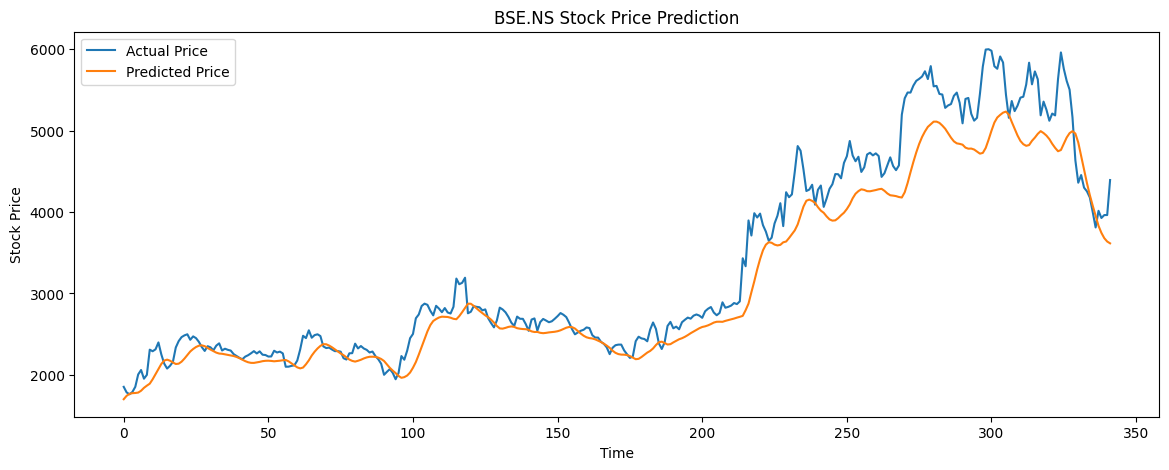

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import yfinance as yf

# Step 1: Data Collection
def get_stock_data(ticker, start, end):
    df = yf.download(ticker, start=start, end=end)
    return df

# Step 2: Load Data
stock_ticker = 'BSE.NS'  # Apple stock
start_date = '2015-01-01'
end_date = '2025-03-20'
data = get_stock_data(stock_ticker, start_date, end_date)

# Step 3: Data Preprocessing
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data[['Close']])

train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 60  # Lookback period of 60 days
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Step 4: Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 6: Evaluate the Model
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

# Step 7: Plot Results
plt.figure(figsize=(14,5))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.legend()
plt.title(f'{stock_ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()


In [ ]:
!pip install ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=98327ad48db67567b14740de515d357c648da6bc7d51b411b661cf287251005d
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta
